In [29]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [30]:
path = r'/Users/ryansmitz/Instacart_Basket_Analysis_11_28_23'

In [31]:
#1 import the merged dataset
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged.pkl'))

In [32]:
#eliminate column limit in display
pd.set_option('display.max_columns', None)

In [33]:
#view the dataframe visually
df_merged.head(15)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer


#2 the first_name and last_name columns are PII, and the other columns merged from the customer table (like state and age) could help create a profile of information to identify an individual. If needed, a new dataframe without first_name and last_name could be created, according to the discretion of senior project management. 

In [34]:
#create a crosstab to investigate suspect values in days_since_prior_order
crosstab = pd.crosstab(df_merged['days_since_prior_order'], df_merged['order_number'], dropna = False)

In [35]:
#crosstab to clipboard to view in excel. Hypothesis is confirmed that missing values are due to order_number being 1
crosstab.to_clipboard()

In [36]:
#3 assigning states to regions and looking for trends in spending by region

result = []

for value in df_merged["state"]:
    if value in ["Maine","New Hampshire","Vermont","Massachusetts","Rhode Island","Connecticut","New York", "Pennsylvania", "New Jersey"]:
      result.append("Northeast")
    elif value in ["Wisconsin","Michigan","Illinois","Indiana","Ohio","North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Iowa", "Missouri"]:
      result.append("Midwest")
    elif value in ["Delaware","Maryland","District of Columbia","Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida","Kentucky", "Tennessee","Mississippi","Alabama", "Oklahoma","Texas", "Arkansas","Louisiana"]:
      result.append("South")
    elif value in ["Idaho","Montana","Wyoming","Nevada","Utah","Colorado","Arizona","New Mexico","Alaska","Washington","Oregon","California","Hawaii"]:
      result.append("West")
    else:
      result.append("Unknown")
                

In [37]:
df_merged['region'] = result

In [38]:
#check the new column visually
df_merged.head(20)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest


In [39]:
#confirm that no states returned unknown region
df_merged['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [40]:
#create a crosstab between spending and region
crosstab = pd.crosstab(df_merged['region'], df_merged['purchase_flag'], dropna = False)

In [41]:
#copy to crosstab to clipboard to view in excel
crosstab.to_clipboard()

In [42]:
#create dictionary with this crosstab data
data = {'region': ['Midwest','Northeast','South','West'],
        'High Spender': [155613,107983,209051,159972],
        'Low Spender': [7441712, 5614753,10582834,8132941]
}

In [43]:
#create dataframe with dictionary
df_cross_1 = pd.DataFrame(data)

<Axes: title={'center': 'Customer Spending Status by Region'}, xlabel='region'>

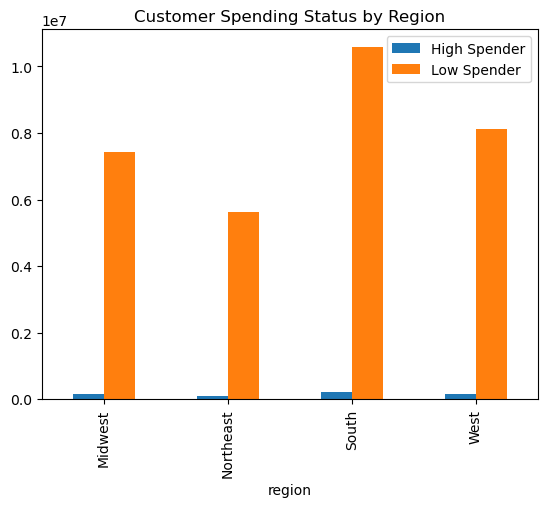

In [44]:
#create a line chart 
df_cross_1.plot(kind='bar', x='region', stacked=False, title = 'Customer Spending Status by Region')

In [45]:
#create a dictionary with only the high spender data from the crosstab
data_2 = {'region': ['Midwest','Northeast','South','West'],
        'High Spender': [155613,107983,209051,159972]
}

In [46]:
#create dataframe with only high spender data
df_cross_2 = pd.DataFrame(data_2)

<Axes: title={'center': 'High Spenders by Region'}, xlabel='region'>

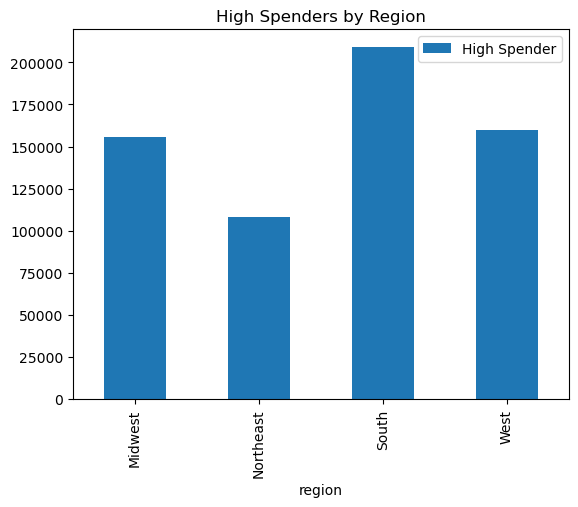

In [47]:
#create bar chart 
df_cross_2.plot(kind='bar', x='region', stacked=False, title = 'High Spenders by Region')

In [48]:
#4 create a result set based on max_order column

result_2 = []

for value in df_merged["max_order"]:
    if value >= 5:
        result_2.append("Regular activity")
    elif value < 5:
        result_2.append("Low activity")

In [49]:
#assign the result set to a new column
df_merged['activity_flag'] = result_2

In [50]:
#visualize the dataframe
df_merged.head(20)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag,region,activity_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity


In [51]:
#check to see how many entries are low activity vs high activity
df_merged['activity_flag'].value_counts()

activity_flag
Regular activity    30964564
Low activity         1440295
Name: count, dtype: int64

In [52]:
#create a new dataframe that excludes low activity customers
df_merged_regular_activity = df_merged[df_merged['activity_flag'] == "Regular activity"]

In [53]:
df_merged_regular_activity.head(30)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag,region,activity_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity


In [54]:
#export the dataframe
df_merged_regular_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged_regular_activity.pkl'))

In [55]:
#5 define a function to profile for parent status using information from multiple columns (department 18 is babies)
def profile_customer(row):
    if (row['age']>= 19 and row['age'] <= 55) and (row['department_id'] == 18) and (row['n_dependents'] >= 1):
        return 'infant parent'
    elif (row['age']>= 19 and row['age'] <= 55) and (row['n_dependents'] >= 1):
        return 'regular parent'
    else:
        return 'other'

In [56]:
df_merged_regular_activity['parent_profile'] = df_merged_regular_activity.apply(profile_customer, axis=1)

/var/folders/8s/hd59lm_10lz7xmm3phb5dc800000gn/T/ipykernel_52948/4126799032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_regular_activity['parent_profile'] = df_merged_regular_activity.apply(profile_customer, axis=1)


In [57]:
df_merged_regular_activity.head(25)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag,region,activity_flag,parent_profile
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent


In [58]:
#check to see the value counts of the parent profile column
df_merged_regular_activity['parent_profile'].value_counts()

parent_profile
other             17461932
regular parent    13322422
infant parent       180210
Name: count, dtype: int64

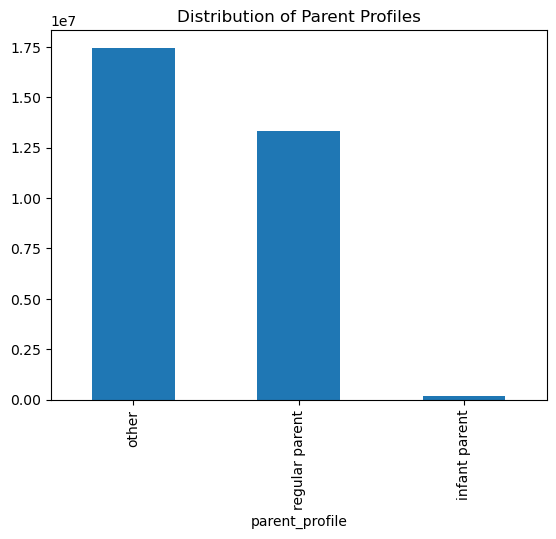

In [59]:
#6 create bar chart to visualize parent profile column
bar_4 = df_merged_regular_activity['parent_profile'].value_counts().plot.bar(title = 'Distribution of Parent Profiles')

In [60]:
#export visualization
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_profile_counts.png'))

In [61]:
#7 aggregate on parent profile level for expenditure
df_merged_regular_activity.groupby('parent_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
parent_profile                         
infant parent    7.652803  1.0     15.0
other           12.024476  1.0  99999.0
regular parent  11.846577  1.0  99999.0

In [62]:
#7 aggregate on parent profile level for order frequency
df_merged_regular_activity.groupby('parent_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
parent_profile                                  
infant parent                9.622689  0.0  30.0
other                       10.820444  0.0  30.0
regular parent              10.813228  0.0  30.0

In [63]:
#8 compare value counts of the parent_profile by region
parent_profile_counts = df_merged_regular_activity.groupby('region')['parent_profile'].value_counts().unstack(fill_value=0)

In [64]:
parent_profile_counts

parent_profile,infant parent,other,regular parent
region,,,
Midwest,42439,4081580,3137494
Northeast,33196,3086688,2344801
South,60834,5810404,4439901
West,43741,4483260,3400226


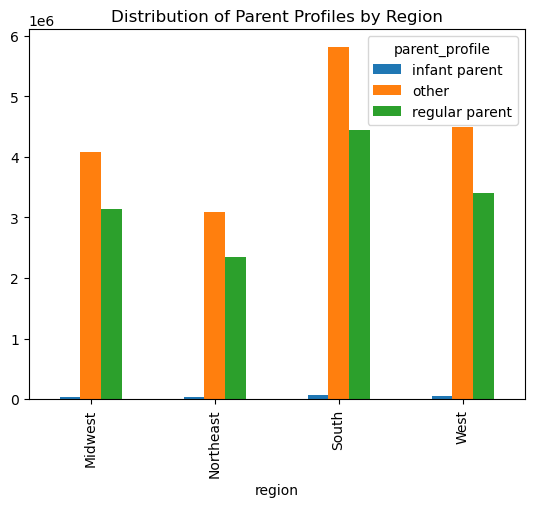

In [65]:
#create bar graph comparing parent profile value counts by region
bar_5 = parent_profile_counts.plot.bar(title = 'Distribution of Parent Profiles by Region')

In [66]:
#set y axis
bar_5.set_ylabel('Number of Transactions')

Text(4.444444444444452, 0.5, 'Number of Transactions')

In [67]:
#9 create chart of results
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_profile_counts_by_region.png'))

In [68]:
#manually create a dataframe of just the regional infant parent value counts
data_3 = {'region': ['Midwest','Northeast','South','West'],
        'infant parent': [18895,14862,27016,18695],
          
}

In [69]:
df_cross_3 = pd.DataFrame(data_3)

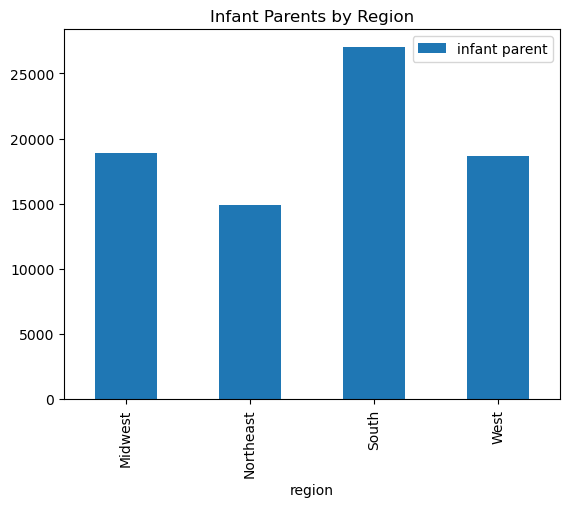

In [70]:
#create bar chart comparing the value counts of parent status by region
bar_6 = df_cross_3.plot(kind='bar', x='region', stacked=False, title = 'Infant Parents by Region')

In [71]:
#export visualization
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'infant_parent_count_by_region.png'))

In [72]:
#8 compare value counts of the parent_profile by department
parent_profile_counts_2 = df_merged_regular_activity.groupby('department_id')['parent_profile'].value_counts().unstack(fill_value=0)

In [73]:
parent_profile_counts_2

parent_profile,infant parent,other,regular parent
department_id,,,
1,0,1196688,925043
2,0,19433,14978
3,0,633368,487460
4,0,5125287,3953986
5,0,82378,62249
6,0,143922,112069
7,0,1458475,1113426
8,0,53098,39962
9,0,462831,359305


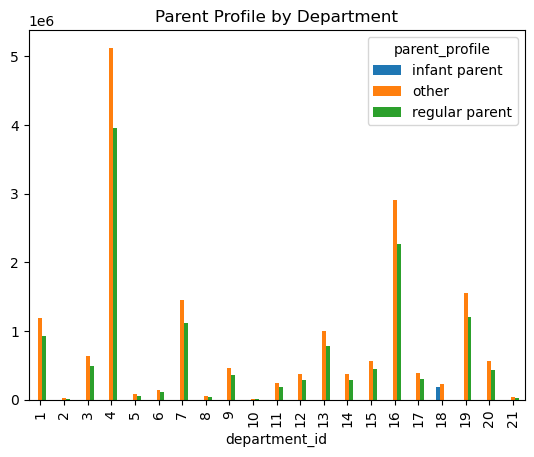

In [74]:
#create bar graph comparing parent profile value counts by department
bar_6 = parent_profile_counts_2.plot.bar(title = 'Parent Profile by Department')

In [75]:
#create a profile based on income

result_3 = []

for value in df_merged_regular_activity["income"]:
  if value <= 45000:
    result_3.append("low income")
  elif (value > 45000) & (value < 100000):
    result_3.append("mid income")
  elif value > 100000:
    result_3.append("high income")
  else:
    result_3.append("income unknown")

In [76]:
#assign the result set to a new column
df_merged_regular_activity['income_profile'] = result_3

/var/folders/8s/hd59lm_10lz7xmm3phb5dc800000gn/T/ipykernel_52948/2094870634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_regular_activity['income_profile'] = result_3


In [77]:
df_merged_regular_activity.head(25)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,order_day_of_week_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_purchase,purchase_flag,median_order_frequency,order_frequency_flag,region,activity_flag,parent_profile,income_profile
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Tuesday,Second slowest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Average_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Thursday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.0,both,Mid-range product,Sunday,Second busiest day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,both,Low-range product,Monday,Regularly busy day,Most_orders,8,New customer,7.788889,Low Spender,19.0,frequent customer,Midwest,Regular activity,regular parent,high income


In [78]:
#check to see the value counts of the income profile column
df_merged_regular_activity['income_profile'].value_counts()

income_profile
mid income        14238342
high income       14207028
low income         2518820
income unknown         374
Name: count, dtype: int64

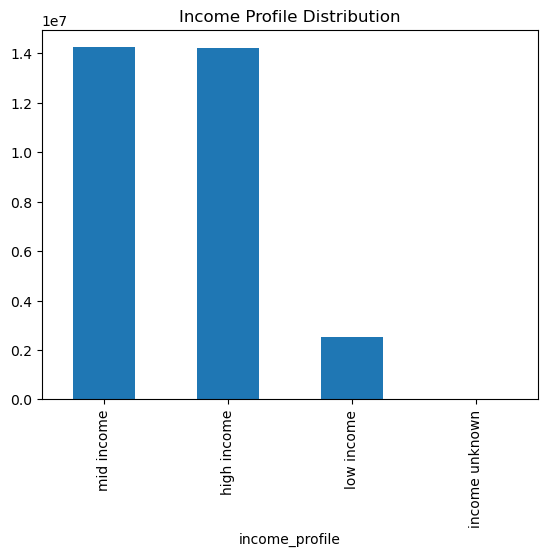

In [79]:
# create bar graph to visualize income profile column
bar_5 = df_merged_regular_activity['income_profile'].value_counts().plot.bar(title = 'Income Profile Distribution')

In [80]:
# compare value counts of the income_profile by region
income_profile_counts = df_merged_regular_activity.groupby('region')['income_profile'].value_counts().unstack(fill_value=0)

In [81]:
income_profile_counts

income_profile,high income,income unknown,low income,mid income
region,,,,
Midwest,3400093,0,572646,3288774
Northeast,2516484,0,446168,2502033
South,4663571,374,854810,4792384
West,3626880,0,645196,3655151


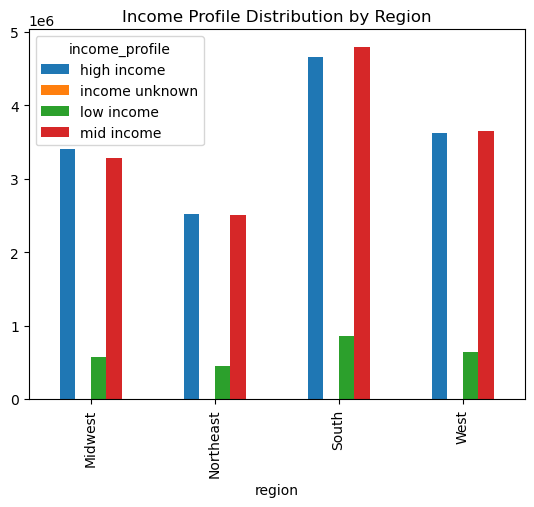

In [82]:
#create bar graph comparing income profile value counts by region
bar_6 = income_profile_counts.plot.bar(title = 'Income Profile Distribution by Region')

In [83]:
# compare value counts of the income_profile by department_id
income_profile_counts_2 = df_merged_regular_activity.groupby('department_id')['income_profile'].value_counts().unstack(fill_value=0)

In [84]:
income_profile_counts_2

income_profile,high income,income unknown,low income,mid income
department_id,,,,
1,988452,48,161053,972178
2,15749,1,2969,15692
3,527703,8,78253,514864
4,4236921,81,608803,4233468
5,69142,0,13462,62023
6,119987,4,15908,120092
7,1126437,25,292158,1153281
8,45089,0,6851,41120
9,392709,22,47321,382084


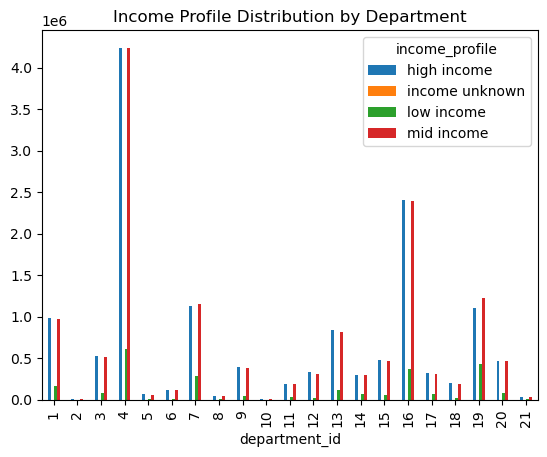

In [85]:
#create bar chart comparing income profile value counts by department_id
bar_7 = income_profile_counts_2.plot.bar(title = 'Income Profile Distribution by Department')

#High and mid income profiles make more purchases in the produce department (4) than the lower income profile. The lower income profile makes a proportionally high number of purchases in the snacks department (19). This breakdown by department id can be used to better understand customer purchasing habits and potentially inform marketing campaigns.

In [86]:
#set y axis
bar_7.set_ylabel('Number of Transactions')

Text(4.444444444444452, 0.5, 'Number of Transactions')

In [87]:
#export visualization
bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_by_dept.png'))

In [88]:
#export the dataframe
df_merged_regular_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged_regular_activity_with_parent_profile.pkl'))